In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
db_params = {
    'dbname': 'dvdrental',
    'user': 'postgres',
    'password': 'password',
    'host': 'localhost', 
    'port': '5432'
}

connect = psycopg2.connect(**db_params)

OperationalError: 

In [3]:
'''
1.1 Connect to your local postgres instance from python (use the pyscopg2 library).
'''
# Database connection parameters
dbname = "dvdrental2"
user = "postgres"
password = "0"
host = "localhost"
port = "5432"

# Establish a connection
connection = psycopg2.connect(
    dbname=dbname,
    user=user,
    password=password,
    host=host,
    port=port
)


OperationalError: connection to server at "172.17.0.2", port 5432 failed: Connection timed out (0x0000274C/10060)
	Is the server running on that host and accepting TCP/IP connections?


In [3]:
'''
1.2 Write a query to return a dataset with film, rental, and payment information. Your dataset 
should have multiple rows per film, one for each time the film was rented and the amount spent 
on each rental. Create a dataframe with this information
'''
# SQL query
query = """
    SELECT
        f.*,
        r.rental_date,
        p.amount 
    FROM
        film AS f
    JOIN
        inventory AS i ON f.film_id = i.film_id
    JOIN
        rental AS r ON i.inventory_id = r.inventory_id
    JOIN
        payment AS p ON r.rental_id = p.rental_id;
"""

# Create a DataFrame from the query result
film_rental_payment_df = pd.read_sql_query(query, connection)

C:\Users\93505\AppData\Local\Temp\ipykernel_27052\2762545818.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  film_rental_payment_df = pd.read_sql_query(query, connection)


In [4]:
film_rental_payment_df

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext,rental_date,amount
0,663,PATIENT SISTER,A Emotional Epistle of a Squirrel And a Robot ...,2006,1,None,7,0.99,99,29.99,NC-17,2006-02-15 05:03:42,"[Trailers, Commentaries]",'confront':14 'emot':4 'epistl':5 'georgia':19...,2005-05-25 11:30:37,2.99
1,875,TALENTED HOMICIDE,A Lacklusture Panorama of a Dentist And a Fore...,2006,1,None,6,0.99,173,9.99,PG,2006-02-15 05:03:42,"[Commentaries, Deleted Scenes, Behind the Scenes]",'boat':22 'dentist':8 'forens':11 'homicid':2 ...,2005-05-28 10:35:23,0.99
2,611,MUSKETEERS WAIT,A Touching Yarn of a Student And a Moose who m...,2006,1,None,7,4.99,73,17.99,PG,2006-02-15 05:03:42,"[Deleted Scenes, Behind the Scenes]",'australia':19 'cow':17 'fight':14 'mad':16 'm...,2005-06-15 00:54:12,5.99
3,228,DETECTIVE VISION,A Fanciful Documentary of a Pioneer And a Woma...,2006,1,None,4,0.99,143,16.99,PG-13,2006-02-15 05:03:42,"[Trailers, Commentaries, Behind the Scenes]",'ancient':18 'detect':1 'documentari':5 'fanci...,2005-06-15 18:02:53,0.99
4,308,FERRIS MOTHER,A Touching Display of a Frisbee And a Frisbee ...,2006,1,None,3,2.99,142,13.99,PG,2006-02-15 05:03:42,"[Trailers, Deleted Scenes, Behind the Scenes]","'display':5 'ferri':1 'frisbe':8,11 'girl':16 ...",2005-06-15 21:08:46,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16044,1000,ZORRO ARK,A Intrepid Panorama of a Mad Scientist And a B...,2006,1,None,3,4.99,50,18.99,NC-17,2006-02-15 05:03:42,"[Trailers, Commentaries, Behind the Scenes]","'ark':2 'boy':12,17 'intrepid':4 'mad':8 'mona...",2005-08-21 17:43:42,4.99
16045,891,TIMBERLAND SKY,A Boring Display of a Man And a Dog who must R...,2006,1,None,3,0.99,69,13.99,G,2006-02-15 05:03:42,[Commentaries],'boat':21 'bore':4 'display':5 'dog':11 'girl'...,2005-08-21 21:41:57,1.99
16046,881,TEMPLE ATTRACTION,A Action-Packed Saga of a Forensic Psychologis...,2006,1,None,5,4.99,71,13.99,PG,2006-02-15 05:03:42,"[Commentaries, Deleted Scenes]",'action':5 'action-pack':4 'attract':2 'battl'...,2005-08-23 06:09:44,8.99
16047,869,SUSPECTS QUILLS,A Emotional Epistle of a Pioneer And a Crocodi...,2006,1,None,4,2.99,47,22.99,PG,2006-02-15 05:03:42,[Trailers],'battl':14 'crocodil':11 'emot':4 'epistl':5 '...,2005-08-23 11:08:46,2.99


In [5]:
'''
1.3 Create a dataframe from the customer table
'''
customer_query = "SELECT * FROM customer;"

customer_df = pd.read_sql_query(customer_query, connection)

C:\Users\93505\AppData\Local\Temp\ipykernel_27052\1895054299.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customer_df = pd.read_sql_query(customer_query, connection)


In [6]:
customer_df

,customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,True,2006-02-14,2006-02-15 04:57:20,1
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,True,2006-02-14,2006-02-15 04:57:20,1
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,True,2006-02-14,2006-02-15 04:57:20,1
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,True,2006-02-14,2006-02-15 04:57:20,1
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,True,2006-02-14,2006-02-15 04:57:20,1
...,...,...,...,...,...,...,...,...,...,...
594,595,1,TERRENCE,GUNDERSON,TERRENCE.GUNDERSON@sakilacustomer.org,601,True,2006-02-14,2006-02-15 04:57:20,1
595,596,1,ENRIQUE,FORSYTHE,ENRIQUE.FORSYTHE@sakilacustomer.org,602,True,2006-02-14,2006-02-15 04:57:20,1
596,597,1,FREDDIE,DUGGAN,FREDDIE.DUGGAN@sakilacustomer.org,603,True,2006-02-14,2006-02-15 04:57:20,1
597,598,1,WADE,DELVALLE,WADE.DELVALLE@sakilacustomer.org,604,True,2006-02-14,2006-02-15 04:57:20,1


In [7]:
'''
2.1 Create a column for customer name that has the first name and last name in the same column.
'''
customer_df['customer_name'] = customer_df['first_name'] + ' ' + customer_df['last_name']
customer_df['customer_name']

0              MARY SMITH
1        PATRICIA JOHNSON
2          LINDA WILLIAMS
3           BARBARA JONES
4         ELIZABETH BROWN
              ...        
594    TERRENCE GUNDERSON
595      ENRIQUE FORSYTHE
596        FREDDIE DUGGAN
597         WADE DELVALLE
598        AUSTIN CINTRON
Name: customer_name, Length: 599, dtype: object

In [8]:
'''
2.2 Remove any inactive customers from the dataframe
Hint: use the active field
'''
# Remove inactive customers (customers where 'active' is False)
customer_df = customer_df[customer_df['active']==1]
customer_df

,customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active,customer_name
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,True,2006-02-14,2006-02-15 04:57:20,1,MARY SMITH
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,True,2006-02-14,2006-02-15 04:57:20,1,PATRICIA JOHNSON
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,True,2006-02-14,2006-02-15 04:57:20,1,LINDA WILLIAMS
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,True,2006-02-14,2006-02-15 04:57:20,1,BARBARA JONES
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,True,2006-02-14,2006-02-15 04:57:20,1,ELIZABETH BROWN
...,...,...,...,...,...,...,...,...,...,...,...
594,595,1,TERRENCE,GUNDERSON,TERRENCE.GUNDERSON@sakilacustomer.org,601,True,2006-02-14,2006-02-15 04:57:20,1,TERRENCE GUNDERSON
595,596,1,ENRIQUE,FORSYTHE,ENRIQUE.FORSYTHE@sakilacustomer.org,602,True,2006-02-14,2006-02-15 04:57:20,1,ENRIQUE FORSYTHE
596,597,1,FREDDIE,DUGGAN,FREDDIE.DUGGAN@sakilacustomer.org,603,True,2006-02-14,2006-02-15 04:57:20,1,FREDDIE DUGGAN
597,598,1,WADE,DELVALLE,WADE.DELVALLE@sakilacustomer.org,604,True,2006-02-14,2006-02-15 04:57:20,1,WADE DELVALLE


In [9]:
'''
2.3 Change the email addresses to be ‘joe.person@wustl.edu’, but only when their store_id is an 
even number
Hint: use apply to run a function over the dataframe, don’t forget to select the correct axis
'''

def update_email(row):
    if row['store_id'] % 2 == 0:
        return 'joe.person@wustl.edu'
    else:
        return row['email']

# Apply the function to the 'email' column
customer_df['email'] = customer_df.apply(update_email, axis=1)
customer_df

C:\Users\93505\AppData\Local\Temp\ipykernel_27052\1467556540.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['email'] = customer_df.apply(update_email, axis=1)


,customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active,customer_name
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,True,2006-02-14,2006-02-15 04:57:20,1,MARY SMITH
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,True,2006-02-14,2006-02-15 04:57:20,1,PATRICIA JOHNSON
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,True,2006-02-14,2006-02-15 04:57:20,1,LINDA WILLIAMS
3,4,2,BARBARA,JONES,joe.person@wustl.edu,8,True,2006-02-14,2006-02-15 04:57:20,1,BARBARA JONES
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,True,2006-02-14,2006-02-15 04:57:20,1,ELIZABETH BROWN
...,...,...,...,...,...,...,...,...,...,...,...
594,595,1,TERRENCE,GUNDERSON,TERRENCE.GUNDERSON@sakilacustomer.org,601,True,2006-02-14,2006-02-15 04:57:20,1,TERRENCE GUNDERSON
595,596,1,ENRIQUE,FORSYTHE,ENRIQUE.FORSYTHE@sakilacustomer.org,602,True,2006-02-14,2006-02-15 04:57:20,1,ENRIQUE FORSYTHE
596,597,1,FREDDIE,DUGGAN,FREDDIE.DUGGAN@sakilacustomer.org,603,True,2006-02-14,2006-02-15 04:57:20,1,FREDDIE DUGGAN
597,598,1,WADE,DELVALLE,WADE.DELVALLE@sakilacustomer.org,604,True,2006-02-14,2006-02-15 04:57:20,1,WADE DELVALLE


C:\Users\93505\AppData\Local\Temp\ipykernel_27052\3936524229.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customer_payment_df = pd.read_sql_query(cpay_query, connection)


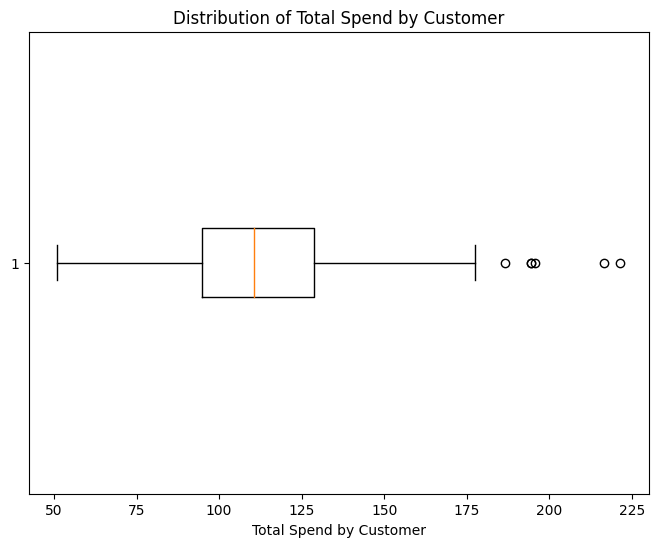

In [10]:
'''
3.1 How much does each customer tend to spend in aggregate?
Clarification: You want to first create total spend by customer, then you want to visualize that 
distribution, each customer being an observation. A box and whisker plot would be a good 
visualization
'''

cpay_query = """
SELECT
    customer.customer_id,
    p.amount
FROM
    customer
JOIN
    payment AS p ON customer.customer_id = p.customer_id;
"""
customer_payment_df = pd.read_sql_query(cpay_query, connection)
customer_total_spend = customer_payment_df.groupby('customer_id')['amount'].sum()

# Create a box and whisker plot
plt.figure(figsize=(8, 6))
plt.boxplot(customer_total_spend, vert=False)
plt.xlabel('Total Spend by Customer')
plt.title('Distribution of Total Spend by Customer')
plt.show()


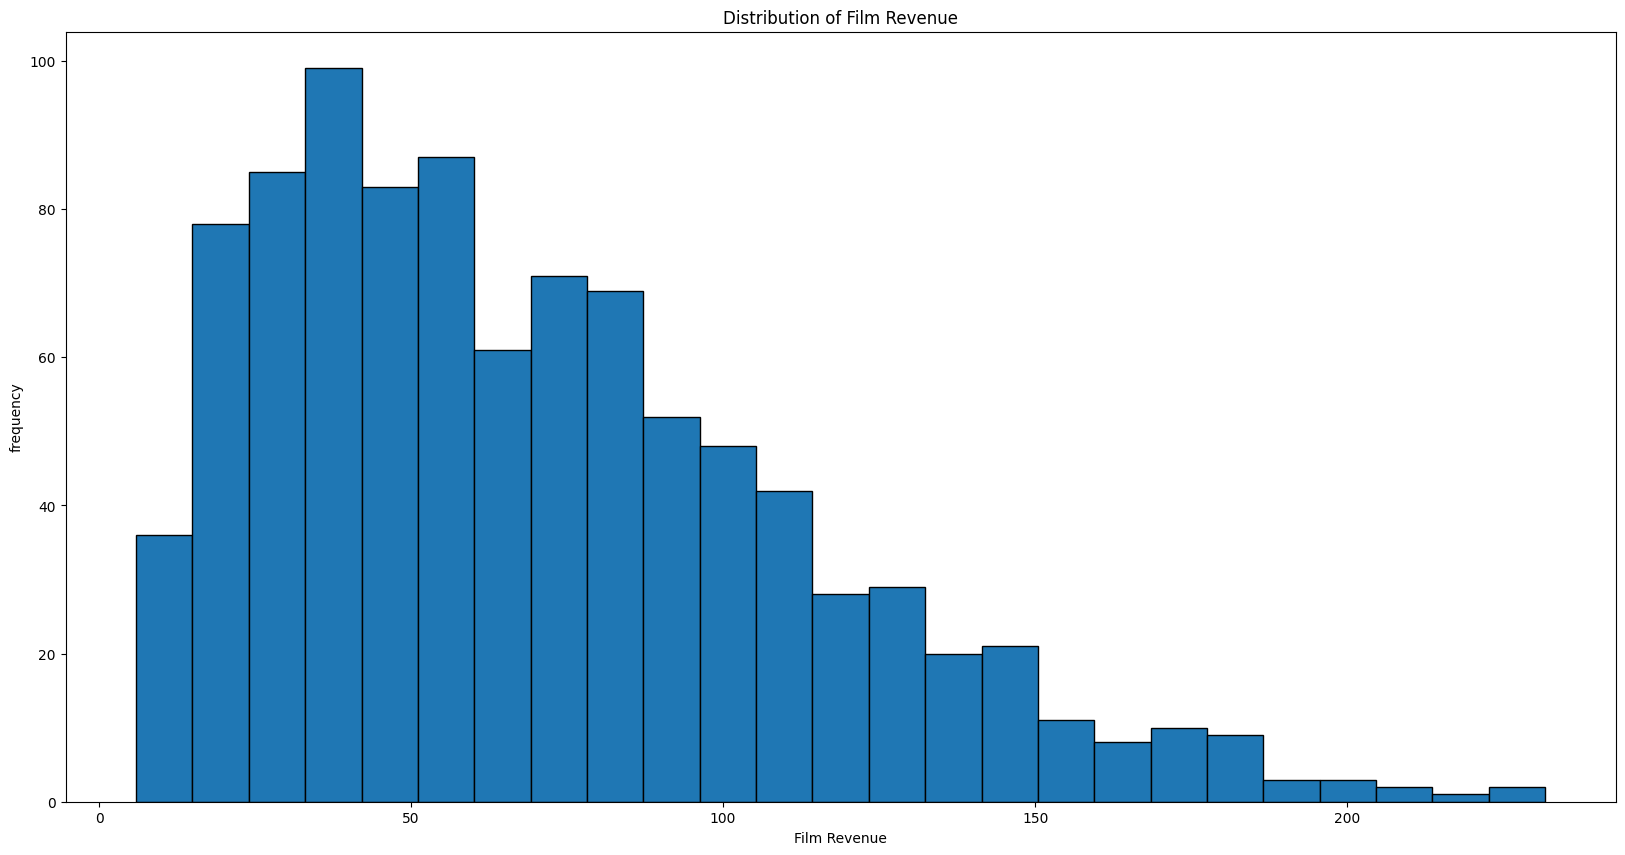

In [11]:
'''
3.2 What does the distribution of film revenue look like?
Clarification: You want to first calculate the revenue by film, you can sum the rental rate for 
each instance that the film was rented using the dataframe you created in section 1 part 2. A 
histogram would be a good visualization
'''
# Group by film and calculate the total revenue
film_revenue = film_rental_payment_df.groupby('film_id')['amount'].sum()

# Create a histogram of film revenue
plt.figure(figsize=(20, 10))
plt.hist(film_revenue, bins=25, edgecolor='k')
plt.xlabel('Film Revenue')
plt.ylabel('frequency')
plt.title('Distribution of Film Revenue')
plt.show()


rating
G        2.888876
NC-17    2.970952
PG       3.051856
PG-13    3.034843
R        2.938718
Name: rental_rate, dtype: float64


C:\Users\93505\AppData\Local\Temp\ipykernel_27052\3419883218.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  film_rental_rate_df = pd.read_sql_query(rate_query, connection)


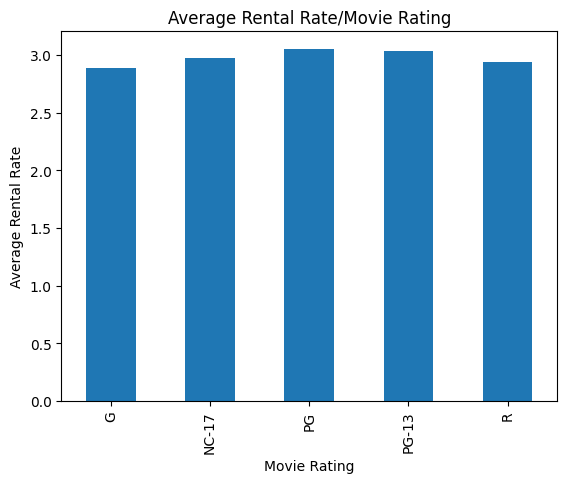

In [12]:
'''
4.1 On average, is the rental rate the same across movie ratings, treat each film as an observation?
'''
# Calculate and print the mean rental rate for each rating
rate_query = """
SELECT
    f.film_id,
    f.rating,
    f.rental_rate
FROM
    film AS f;
"""
film_rental_rate_df = pd.read_sql_query(rate_query, connection)

mean_rental_rate_by_rating = film_rental_rate_df.groupby('rating')['rental_rate'].mean()
print(mean_rental_rate_by_rating)

mean_rental_rate_by_rating.plot(kind='bar')
plt.xlabel('Movie Rating')
plt.ylabel('Average Rental Rate')
plt.title('Average Rental Rate/Movie Rating')
plt.show()

C:\Users\93505\AppData\Local\Temp\ipykernel_27052\3452402452.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  film_store_rental_df = pd.read_sql_query(store_rental_query, connection)


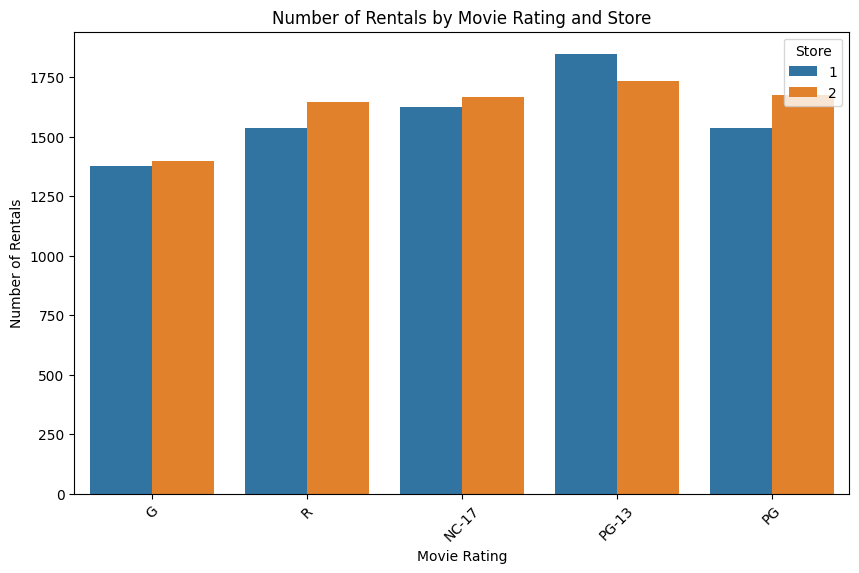

In [13]:
'''
4.2 Across the various film ratings, are we observing the same number of movies rented at store 2 and store 1?
'''
store_rental_query = """
    SELECT
        f.film_id,
        f.rating,
        i.store_id
    FROM
        film AS f
    JOIN
        inventory AS i ON f.film_id = i.film_id
    JOIN
        rental AS r ON i.inventory_id = r.inventory_id;
"""

# Create a DataFrame from the query result
film_store_rental_df = pd.read_sql_query(store_rental_query, connection)


# Create a count plot of movies rented at store 1 and store 2 for each movie rating
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', hue='store_id', data=film_store_rental_df)
plt.xlabel('Movie Rating')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals by Movie Rating and Store')
plt.xticks(rotation=45)
plt.legend(title='Store', loc='upper right')

plt.show()


C:\Users\93505\AppData\Local\Temp\ipykernel_27052\2223591776.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  robot_film_df = pd.read_sql_query(robot_query, connection)
C:\Users\93505\AppData\Local\Temp\ipykernel_27052\2223591776.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  teacher_film_df = pd.read_sql_query(teacher_query, connection)


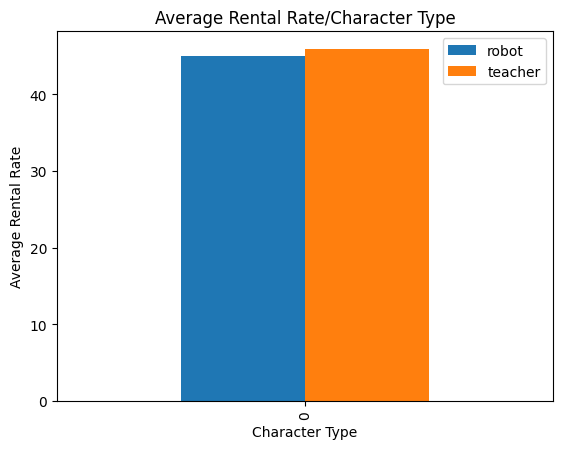

In [14]:
'''
4.3 On average, do films with a character of a ‘robot’ generate the same amount of revenue (use 
rental rate) as films that feature a ‘teacher’?
Hint: sum the rental rate by film across rentals to get revenue by film
'''

robot_query = """
SELECT
    film.film_id,
    film.rental_rate,
    film.description,
    'Robot' AS genre
FROM
    film
JOIN
    inventory ON film.film_id = inventory.film_id
JOIN
    rental ON inventory.inventory_id = rental.inventory_id
WHERE
    film.description LIKE '%Robot%';
"""
robot_film_df = pd.read_sql_query(robot_query, connection)

teacher_query = """
SELECT
    film.film_id,
    film.rental_rate,
    film.description,
    'Robot' AS genre
FROM
    film
JOIN
    inventory ON film.film_id = inventory.film_id
JOIN
    rental ON inventory.inventory_id = rental.inventory_id
WHERE
    film.description LIKE '%Teacher%';
"""
teacher_film_df = pd.read_sql_query(teacher_query, connection)

robot_mean = robot_film_df['rental_rate'].sum()/len(robot_film_df.groupby('film_id'))
teacher_mean = teacher_film_df['rental_rate'].sum()/len(teacher_film_df.groupby('film_id'))

average_avenue=pd.DataFrame({'robot':[robot_mean],'teacher' : [teacher_mean]})
average_avenue.plot(kind='bar')
plt.xlabel('Character Type')
plt.ylabel('Average Rental Rate')
plt.title('Average Rental Rate/Character Type')
plt.show()

In [15]:
'''
5.1 Generate the following. A reference for how to produce random normal observations can be 
found here. Use seed(200) to make sure the results are always the same.
a. x1: 5 observations from a random normal distribution with a mean of 15 and standard 
deviation of 2 
b. x2: 25 observations from a random normal distribution with a mean of 15 and standard 
deviation of 2
c. x3: 125 observations from a random normal distribution with a mean of 15 and standard 
deviation of 2
d. x4: 625 observations from a random normal distribution with a mean of 15 and standard 
deviation of 2
'''
np.random.seed(200)
x1 = np.random.normal(loc=15, scale=2, size=5)
x2 = np.random.normal(loc=15, scale=2, size=25)
x3 = np.random.normal(loc=15, scale=2, size=125)
x4 = np.random.normal(loc=15, scale=2, size=625)

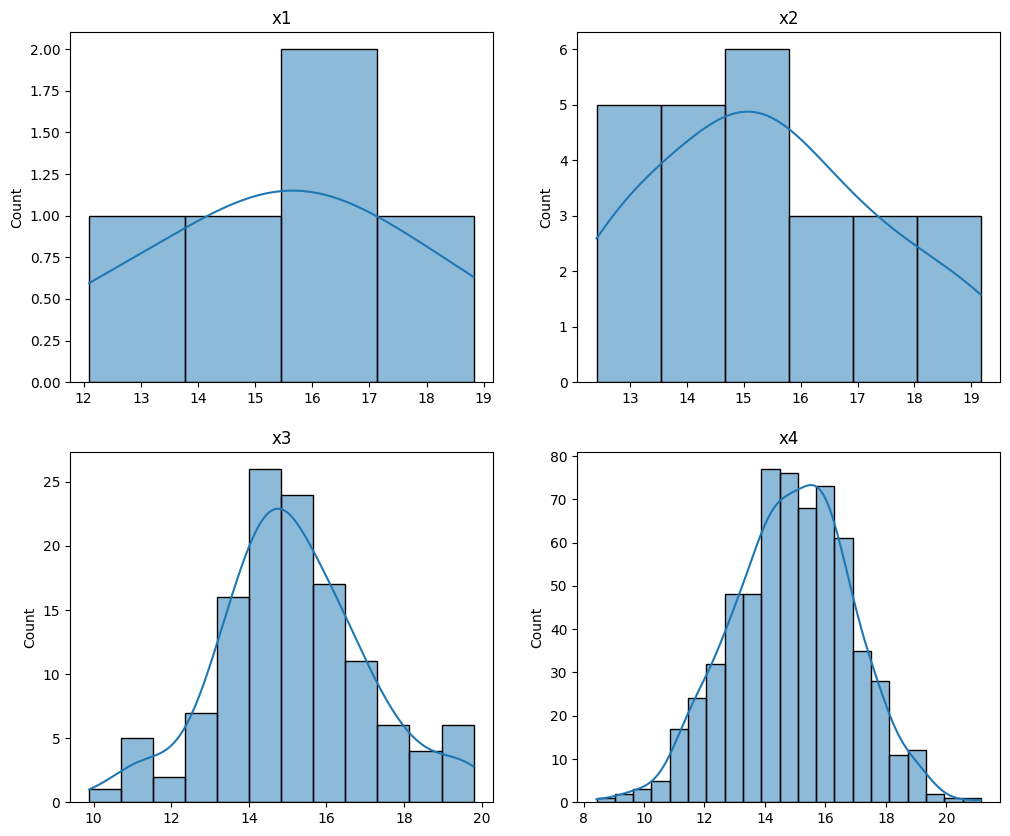

In [16]:
'''
Use subplots to display the histograms of all four sets of numbers. An example of how to do this 
is here. Set kde=True to see how well the histogram approximates a normal p.d.f
'''
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (12,10)) 

sns.histplot(x1, kde=True, ax=axs[0][0]).set_title("x1")
sns.histplot(x2, kde=True, ax=axs[0][1]).set_title("x2")
sns.histplot(x3, kde=True, ax=axs[1][0]).set_title("x3")
sns.histplot(x4, kde=True, ax=axs[1][1]).set_title("x4")


plt.show()

In [17]:
'''
5.3 Compute the sample means, standard deviations, and standard errors of x1, x2, x3, & x4.
'''
mean = 15
std_dev = 2
sample_means = [np.mean(x1), np.mean(x2), np.mean(x3), np.mean(x4)]
sample_std_devs = [np.std(x1, ddof=1), np.std(x2, ddof=1), np.std(x3, ddof=1), np.std(x4, ddof=1)]
sample_std_errors = [sample_std_devs[0] / np.sqrt(len(x1)), sample_std_devs[1] / np.sqrt(len(x2)), sample_std_devs[2] / np.sqrt(len(x3)), 
                     sample_std_devs[3] / np.sqrt(len(x4))]

print(f"sample mean of x1: {sample_means[0]}, standard deviation of x1: {sample_std_devs[0]}, standard error of x1: {sample_std_errors[0]}")
print(f"sample mean of x2: {sample_means[1]}, standard deviation of x2: {sample_std_devs[1]}, standard error of x2: {sample_std_errors[1]}")
print(f"sample mean of x3: {sample_means[2]}, standard deviation of x3: {sample_std_devs[2]}, standard error of x3: {sample_std_errors[2]}")
print(f"sample mean of x4: {sample_means[3]}, standard deviation of x4: {sample_std_devs[3]}, standard error of x4: {sample_std_errors[3]}")

sample mean of x1: 15.514244794423075, standard deviation of x1: 2.4749216338183473, standard error of x1: 1.1068186024405333
sample mean of x2: 15.38155905795485, standard deviation of x2: 1.9974624703136055, standard error of x2: 0.3994924940627211
sample mean of x3: 15.127359290503641, standard deviation of x3: 1.9279950027254826, standard error of x3: 0.17244511545496286
sample mean of x4: 14.887092033617716, standard deviation of x4: 1.9530800573094382, standard error of x4: 0.07812320229237753


In [18]:
'''
6.1 Using numpy & seed(100), generate a Poisson distribution setting lam=12 and 
size=1200
'''
np.random.seed(100)

poisson = np.random.poisson(lam=12, size=1200)

In [19]:
'''
6.2 Compute mean and variance of your 1200 random Poisson values
'''
poisson_mean = np.mean(poisson)
poisson_variance = np.var(poisson, ddof=0)
print("mean of Poisson values :",poisson_mean,"mean of Poisson values :", poisson_variance)

mean of Poisson values : 11.798333333333334 mean of Poisson values : 11.847663888888889


In [20]:
'''
6.3 Does the lambda = mean = variance?
'''
print("mean of Poisson values :",poisson_mean,"mean of Poisson values :", poisson_variance, "lambda of Poisson values :", 12)

mean of Poisson values : 11.798333333333334 mean of Poisson values : 11.847663888888889 lambda of Poisson values : 12


In [21]:
'''
6.4 Repeat 1-3 using size = 4. Does lambda=mean=variance?
'''

poisson = np.random.poisson(lam=12, size=4)
poisson_mean = np.mean(poisson)
poisson_variance = np.var(poisson, ddof=0)
print("mean of Poisson values :",poisson_mean,"mean of Poisson values :", poisson_variance, "lambda of Poisson values :", 12)

mean of Poisson values : 12.75 mean of Poisson values : 5.6875 lambda of Poisson values : 12


In [24]:

Ted_query = """
with b4 as (
 select p.customer_id, sum(p.amount) as Payment_before
 from rental r 
 left outer join payment p on p.rental_id = r.rental_id
 where rental_date < cast('2005-07-01' as timestamp) and
 amount is not null
 group by p.customer_id),
 aft as (
 select p.customer_id, sum(p.amount) as Payment_after
 from rental r 
 left outer join payment p on p.rental_id = r.rental_id
 where rental_date >= cast('2005-07-01' as timestamp) and
 amount is not null
 group by p.customer_id
 )
 select distinct c.customer_id, store_id, first_name, last_name,
 active, payment_before, payment_after
 from customer c
 left outer join b4 r on r.customer_id = c.customer_id
 left outer join aft a on a.customer_id = c.customer_id
 where payment_after is not null and payment_before is not null
"""

payment_compare_df = pd.read_sql_query(Ted_query, connection)

C:\Users\93505\AppData\Local\Temp\ipykernel_27052\3562089694.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  payment_compare_df = pd.read_sql_query(Ted_query, connection)


       payment_before  payment_after
count      598.000000     598.000000
mean        24.186087      88.405385
std         11.028291      22.952164
min          0.990000      27.930000
25%         15.962500      72.092500
50%         22.960000      85.825000
75%         30.930000     102.750000
max         64.870000     188.600000


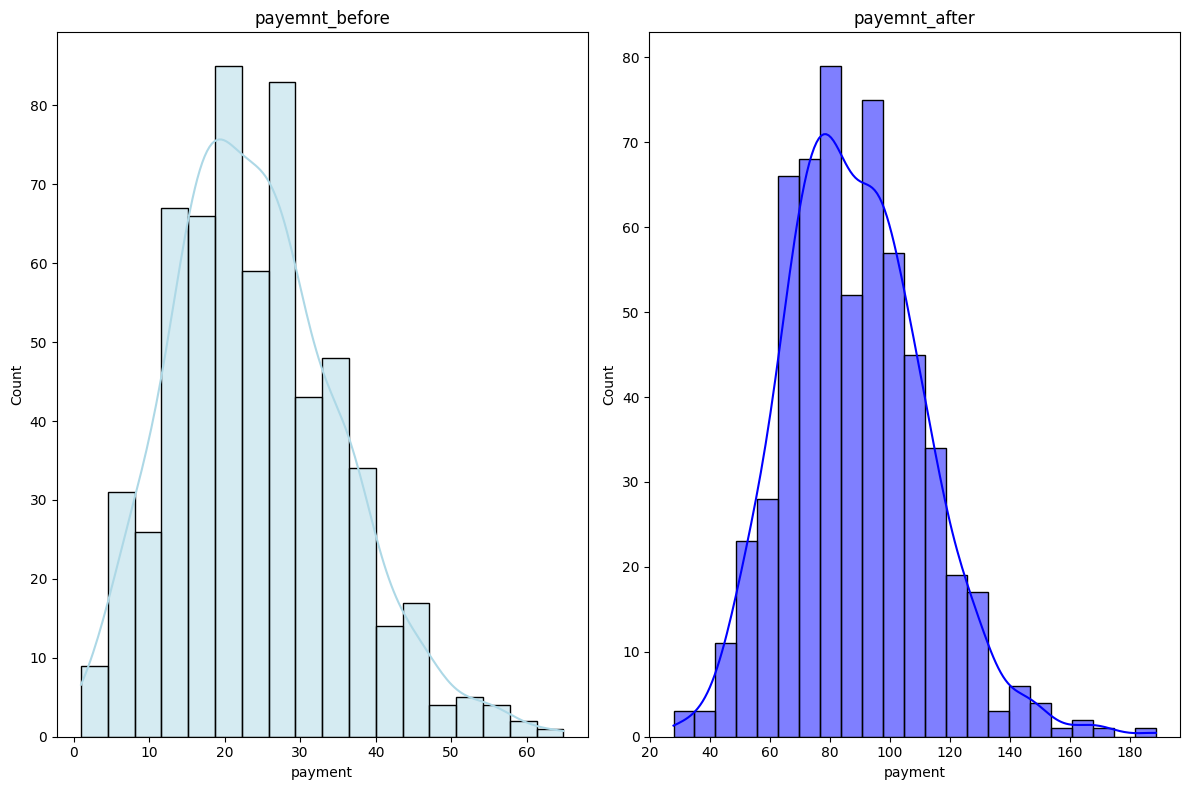

In [25]:
'''
7.4. Compute summary statistics and create histograms of the payment_before and payment_after 
variables. (Try using describe()in pandas).
'''
payment_summary = payment_compare_df[['payment_before', 'payment_after']].describe()
print(payment_summary)

fig, axs = plt.subplots(1,2,figsize=(12,8))

sns.histplot(payment_compare_df["payment_before"], ax=axs[0], alpha = 0.5, kde = True,color='lightblue').set_title("payemnt_before")
axs[0].set_xlabel("payment")

sns.histplot(payment_compare_df["payment_after"], ax=axs[1], alpha = 0.5, kde = True,color='blue').set_title("payemnt_after")
axs[1].set_xlabel("payment")

plt.tight_layout()
plt.show()

Correlation between Payment Before and After: -0.01


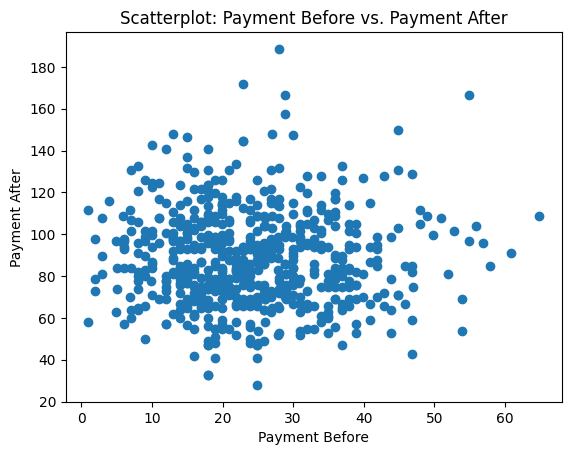

In [26]:
'''
7.5. Compute the correlation between these two variables and create a scatterplot
'''
# Compute correlation
correlation = payment_compare_df['payment_before'].corr(payment_compare_df['payment_after'])
print(f"Correlation between Payment Before and After: {correlation:.2f}")

# Create a scatterplot
plt.scatter(payment_compare_df['payment_before'], payment_compare_df['payment_after'])
plt.xlabel('Payment Before')
plt.ylabel('Payment After')
plt.title('Scatterplot: Payment Before vs. Payment After')
plt.show()


In [27]:
'''
7.6. Compute a variable which is the difference between the amounts spent before and after the 
program started: payment_after – payment_before. 
'''
payment_compare_df['payment_difference'] = payment_compare_df['payment_after'] - payment_compare_df['payment_before']
payment_compare_df

,customer_id,store_id,first_name,last_name,active,payment_before,payment_after,payment_difference
0,413,2,MARVIN,YEE,1,20.96,54.83,33.87
1,525,2,ADRIAN,CLARY,1,8.98,65.83,56.85
2,122,1,THELMA,MURRAY,1,31.91,94.77,62.86
3,52,1,JULIE,SANCHEZ,1,14.95,92.76,77.81
4,330,1,SCOTT,SHELLEY,1,33.93,60.82,26.89
...,...,...,...,...,...,...,...,...
593,228,2,ALLISON,STANLEY,1,19.94,72.79,52.85
594,124,1,SHEILA,WELLS,0,17.95,55.87,37.92
595,224,2,PEARL,GARZA,1,15.97,60.81,44.84
596,427,2,JESUS,MCCARTNEY,1,25.94,88.82,62.88


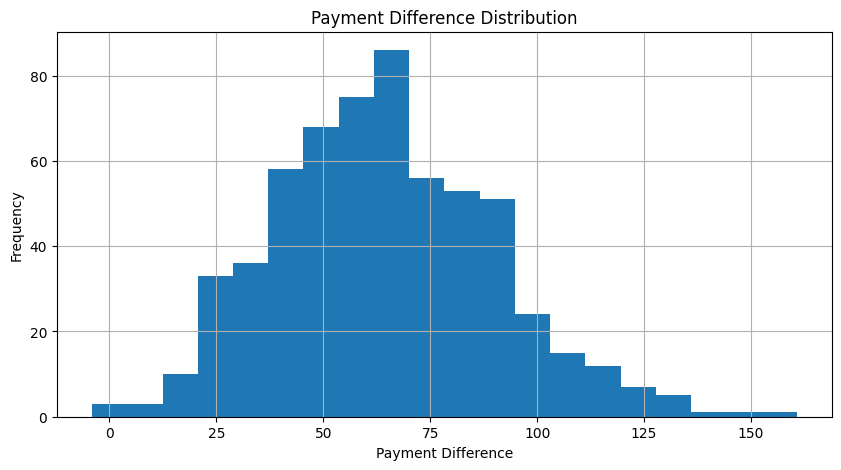

One-Sample t-test Results: t-statistic = 61.44, p-value = 0.0000


In [28]:
'''
7.7. Generate a histogram of the difference and conduct a one-sample t-test
'''
# Generate a histogram of the difference
payment_compare_df['payment_difference'].hist(bins=20, figsize=(10, 5))
plt.xlabel('Payment Difference')
plt.ylabel('Frequency')
plt.title('Payment Difference Distribution')
plt.show()

# Conduct a one-sample t-test (assuming a null hypothesis that the mean difference is zero)
from scipy import stats

t_stat, p_value = stats.ttest_1samp(payment_compare_df['payment_difference'], 0)
print(f"One-Sample t-test Results: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
